In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go

In [2]:
trends_df = pd.read_csv(
    './datasets/trends1.csv',
    parse_dates=['date'],
    usecols=['date','top 1', 'top 2','top 3']
)

In [3]:
predictions = pd.read_csv('./datasets/predictions.csv',parse_dates=['date'],low_memory=False)

In [4]:
trends_df.tail()

,top 1,top 2,top 3,date
256,18,72,35,2017-09-03
257,17,67,37,2017-09-10
258,18,66,32,2017-09-17
259,19,62,31,2017-09-24
260,20,78,27,2017-10-01


In [5]:
predictions.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
top_columns = set(predictions.columns.values.tolist()).difference(set(['date',]))

In [7]:
top_columns

{'fit top 1',
 'fit top 2',
 'fit top 3',
 'fit2 top 1',
 'fit2 top 2',
 'fit2 top 3',
 'fit3 top 1',
 'fit3 top 2',
 'fit3 top 3'}

In [8]:
def plot_tops_trends(df,x_axis='date',y_axis_columns=['top 1','top 2','top 3'],label_col='label'):
    df[
        [
            'date',
            'fit top 1',
            'fit2 top 1',
            'fit3 top 1',
            'fit top 2',
            'fit2 top 2',
            'fit3 top 2',
            'fit top 3',
            'fit2 top 3',
            'fit3 top 3'
            
        ]
    ]
    for top in y_axis_columns:
        top_fig = px.line(df,x=x_axis,y=top,color=label_col)
       
        top_fig.show()
    return

In [9]:
predictions['label'] = predictions['date'].apply(lambda x: 'train' if x <= datetime(year=2017,month=10,day=1) else 'test')

In [66]:
predictions

,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1,label
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028,train
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460,train
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919,train
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192,train
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650,train
...,...,...,...,...,...,...,...,...,...,...,...
621,2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665,test
622,2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394,test
623,2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862,test
624,2018-09-30,16.794364,99.184409,36.900044,36.682254,36.412168,72.847916,63.903832,17.693017,17.720324,test


In [67]:
plot_tops_trends(predictions,y_axis_columns=top_columns)

In [11]:
trends_df['top_1_diff'] = trends_df['top 1'].diff()
trends_df['top_2_diff'] = trends_df['top 2'].diff()
trends_df['top_3_diff'] = trends_df['top 3'].diff()

In [12]:
trends_df.fillna(value=0,inplace=True)

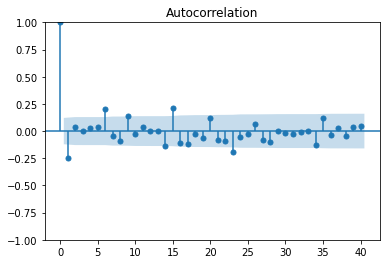

In [13]:
plot_acf(x=trends_df['top_2_diff'].values.squeeze(),lags=40)
plt.show()

In [10]:
plot_pacf(x=trends_df['top_1_diff'].values.squeeze(),lags=48,method='ywm')
plt.show()

KeyError: 'top_1_diff'

In [16]:
parameters_grid_search = [
    {
        "name": "p",
        "type": "choice",
        "values": list(range(0, 2)),
        "value_type": "int",
        "is_ordered": True,
    },
    {
        "name": "d",
        "type": "choice",
        "values": list(range(0, 3)),
        "value_type": "int",
        "is_ordered": True,
    },
    {
        "name": "q",
        "type": "choice",
        "values": list(range(0, 3)),
        "value_type": "int",
        "is_ordered": True,
    },
    {
        "name": "P",
        "type": "choice",
        "values": list(range(5)),
        "value_type": "int",
        "is_ordered": True,
    },
    {
    "name": "D",
    "type": "choice",
    "values": list(range(5)),
    "value_type": "int",
    "is_ordered": True,
    },
    {
    "name": "Q",
    "type": "choice",
    "values": list(range(5)),
    "value_type": "int",
    "is_ordered": True,
    
    },
    {
    "name": "S",
    "type": "choice",
    "values": list(range(12,24)),
    "value_type": "int",
    "is_ordered": True,
    },
]

In [17]:
import kats.utils.time_series_parameter_tuning as tpt
from kats.consts import ModelEnum, SearchMethodEnum, TimeSeriesData
from kats.models.sarima import SARIMAParams, SARIMAModel
import numpy as np

In [18]:
parameter_tuner_grid = tpt.SearchMethodFactory.create_search_method(
    objective_name="evaluation_metric",
    parameters=parameters_grid_search,
    selected_search_method=SearchMethodEnum.GRID_SEARCH,
    multiprocessing=True
)

/home/granite/.local/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "p". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/home/granite/.local/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "d". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/home/granite/.local/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "q". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/home/granite/.local/lib/python3.8/site-

In [19]:
trend_ts_top_1 = TimeSeriesData(df=trends_df[['date','top 1']],time_col_name='date')
trend_ts_top_2 = TimeSeriesData(df=trends_df[['date','top 2']],time_col_name='date')
trend_ts_top_3 = TimeSeriesData(df=trends_df[['date','top 3']],time_col_name='date')

In [20]:
train_ts_top_1,test_ts_top_1 = trend_ts_top_1[:-48],trend_ts_top_1[-48:]

In [21]:
def evaluate_top_one(params):
    train_ts_top_1,test_ts_top_1 = trend_ts_top_1[:-48],trend_ts_top_1[-48:]
    arima_params = SARIMAParams(
        p=params['p'],
        d=params['d'],
        q=params['q'],
        seasonal_order=(params['P'],params['D'],params['Q'],params['S'])
    )
    
    model = SARIMAModel(
        train_ts_top_1,
        arima_params
    )
    model.fit()
    model_pred = model.predict(steps=len(test_ts_top_1))
    error = np.mean((model_pred['fcst'].values - test_ts_top_1.value.values)**2)
    
    return error

In [22]:
parameter_tuner_grid.generate_evaluate_new_parameter_values(
    evaluation_function=evaluate_top_one
)

KeyboardInterrupt: 

In [ ]:
parameter_tuning_results_grid = (
    parameter_tuner_grid.list_parameter_value_scores()
)

parameter_tuning_results_grid

In [ ]:
parameter_tuning_results_grid.sort_values(by = 'mean', ascending=True)

In [ ]:
train_ts_top_1,test_ts_top_1 = trend_ts_top_1[:-48],trend_ts_top_1[-48:]
arima_params = SARIMAParams(
    p=7,
    d=0,
    q=12
)

model = SARIMAModel(
    train_ts_top_1,
    arima_params
)
model.fit()
model_pred = model.predict(steps=len(test_ts_top_1))

In [ ]:
model_pred.plot(x='time')
